### **What is Random Forest?** 
Random Forest is like a super-team of decision trees! Instead of relying on just one decision tree, Random Forest creates many trees and combines their predictions to make better decisions.

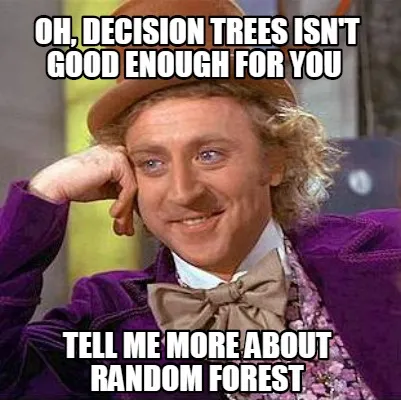
### **How Does Random Forest Work?**
- Random Forest constructs multiple decision trees using random subsets of the training data and features. Think of it like asking several friends for advice. Each friend (tree) looks at the problem from a slightly different angle and gives their own opinion (prediction).
- To make each tree unique, *each tree is trained on a different portion of the data* (with replacement, called bagging). Not all features are used in every tree, which ensures the trees are diverse.
- For classification problems (e.g., spam or not spam): Each tree votes for a class, and the majority vote wins.
- For regression problems (e.g., predicting house prices): The predictions of all trees are averaged to get the final result.

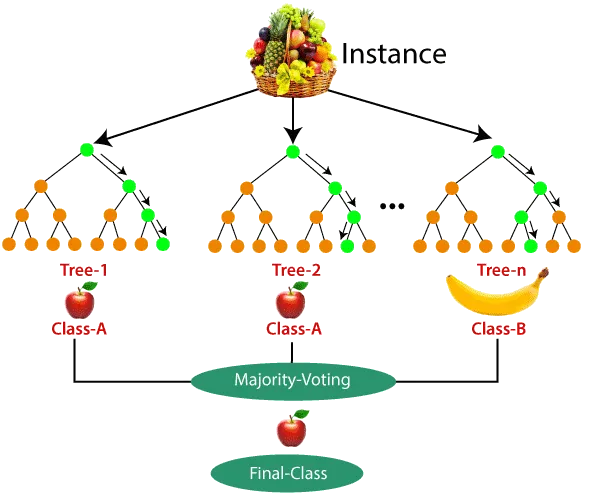
### **Best Practices:**
Tune Hyperparameters: While Random Forests are powerful, you can further improve performance by tuning parameters like:
- n_estimators: The number of trees in the forest. More trees usually result in better accuracy.
- max_depth: Limiting the depth of each tree to prevent overfitting.
- min_samples_split: The minimum number of samples required to split an internal node.
- Feature Importance: Random Forest provides a feature importance score, helping you understand which features contribute the most to predictions.



In [6]:
import nbimporter
from decision_tree import DecisionTree


In [7]:
from collections import Counter

import numpy as np

# creates bootstrap samples of the dataset, where rows are randomly selected with replacement
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]

# finds the most frequent label in a list, used for majority voting 
def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common


class RandomForest:
    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    # for each tree, bootstrap samples to create a training set 
    # create a decision tree with the specified parameters
    # train the tree on the bootstrap sample.
    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth,
                n_feats=self.n_feats,
            )
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)



In [8]:

# Testing
if __name__ == "__main__":
    # Imports
    from sklearn import datasets
    from sklearn.model_selection import train_test_split

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    data = datasets.load_breast_cancer()
    X = data.data
    y = data.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    clf = RandomForest(n_trees=3, max_depth=10)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy(y_test, y_pred)

    print("Accuracy:", acc)

Accuracy: 0.9385964912280702
